In [1]:
# Analysis of evaluation Results

In [2]:
import pandas as pd
import json
import numpy as np

In [3]:
# Load files
evaluation_final_automaxo_path = "final_automaxo_results.json"
maxo_annotations_path = "maxo-annotations.tsv"

In [4]:
# Creating a df from maxo_annotations_path

# Read the TSV file into a DataFrame
maxo_annotations_df = pd.read_csv(maxo_annotations_path, sep='\t')

In [5]:
maxo_annotations_df.columns

Index(['disease_id', 'disease_name', 'citation', 'maxo_id', 'maxo_label',
       'hpo_id', 'maxo_relation', 'evidence_code', 'extension_id',
       'extension_label', 'attribute', 'creator', 'last_update', 'created_on'],
      dtype='object')

In [6]:
selected_maxo_annotations_df = maxo_annotations_df[['citation', 'maxo_id','maxo_label', 'hpo_id','disease_id', 'disease_name']]
# Rename columns
selected_maxo_annotations_df.rename(columns={
    'maxo_id': 'maxo_id_base',
    'maxo_label': 'maxo_label_base',
    'hpo_id': 'hpo_id_base',
    'disease_id': 'mondo_id_base',
    'disease_name': 'mondo_label_base'
}, inplace=True)


# Combine columns to create 'maxo_base' and drop the originals
selected_maxo_annotations_df['maxo_base'] = selected_maxo_annotations_df['maxo_id_base'] + ':' + selected_maxo_annotations_df['maxo_label_base']
selected_maxo_annotations_df.drop(columns=['maxo_id_base', 'maxo_label_base'], inplace=True)

# Combine columns to create 'mondo_base' and drop the originals
selected_maxo_annotations_df['mondo_base'] = selected_maxo_annotations_df['mondo_id_base'] + ':' + selected_maxo_annotations_df['mondo_label_base']
selected_maxo_annotations_df.drop(columns=['mondo_id_base', 'mondo_label_base'], inplace=True)


selected_maxo_annotations_df

/var/folders/p0/qn3c3czj667fgqw88sg__klcr2ymdh/T/ipykernel_10568/680214060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_maxo_annotations_df.rename(columns={
/var/folders/p0/qn3c3czj667fgqw88sg__klcr2ymdh/T/ipykernel_10568/680214060.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_maxo_annotations_df['maxo_base'] = selected_maxo_annotations_df['maxo_id_base'] + ':' + selected_maxo_annotations_df['maxo_label_base']
/var/folders/p0/qn3c3czj667fgqw88sg__klcr2ymdh/T/ipykernel_10568/680214060.py:14: SettingWithCopyWarning: 
A value is tryin

,citation,hpo_id_base,maxo_base,mondo_base
0,PMID:20301537,HP:0000819,MAXO:0000088:dietary intervention,MONDO:0008854:Bardet-biedl Syndrome 1
1,PMID:20301537,HP:0002141,MAXO:0000011:physical therapy,MONDO:0008854:Bardet-biedl Syndrome 1
2,PMID:20301537,HP:0000750,MAXO:0000930:speech therapy,MONDO:0008854:Bardet-biedl Syndrome 1
3,PMID:20301537,HP:0001513,MAXO:0000088:dietary intervention,MONDO:0008854:Bardet-biedl Syndrome 1
4,https://www.ncbi.nlm.nih.gov/books/NBK1345/,HP:0100245,MAXO:0001110:tumorectomy,MONDO:0021056:Adenomatous Polyposis Coli
...,...,...,...,...
408,PMID:20301519,HP:0100245,MAXO:0000646:cancer chemotherapy,MONDO:0021056:Adenomatous Polyposis Coli
409,PMID:20301519,HP:0100245,MAXO:0000635:anti-estrogen agent therapy,MONDO:0021056:Adenomatous Polyposis Coli
410,PMID:20301519,HP:0100245,MAXO:0000221:nonsteroidal anti-inflammatory ag...,MONDO:0021056:Adenomatous Polyposis Coli
411,PMID:12958596,HP:0004315,MAXO:0001480:immunoglobulin infusion therapy,"MONDO:0011971:Immunodeficiency With Hyper-igm,..."


In [7]:

# Convert all string data in the DataFrame to lowercase
selected_maxo_annotations_df = selected_maxo_annotations_df.applymap(lambda s: s.lower() if isinstance(s, str) else s)

# Format the 'citation' column
def format_citation(citation):
    if citation.startswith('pmid:'):
        return citation.split(':')[1]
    else:
        return None
selected_maxo_annotations_df['citation'] = selected_maxo_annotations_df['citation'].apply(format_citation)

/var/folders/p0/qn3c3czj667fgqw88sg__klcr2ymdh/T/ipykernel_10568/2964118436.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  selected_maxo_annotations_df = selected_maxo_annotations_df.applymap(lambda s: s.lower() if isinstance(s, str) else s)


In [8]:
selected_maxo_annotations_df

,citation,hpo_id_base,maxo_base,mondo_base
0,20301537,hp:0000819,maxo:0000088:dietary intervention,mondo:0008854:bardet-biedl syndrome 1
1,20301537,hp:0002141,maxo:0000011:physical therapy,mondo:0008854:bardet-biedl syndrome 1
2,20301537,hp:0000750,maxo:0000930:speech therapy,mondo:0008854:bardet-biedl syndrome 1
3,20301537,hp:0001513,maxo:0000088:dietary intervention,mondo:0008854:bardet-biedl syndrome 1
4,None,hp:0100245,maxo:0001110:tumorectomy,mondo:0021056:adenomatous polyposis coli
...,...,...,...,...
408,20301519,hp:0100245,maxo:0000646:cancer chemotherapy,mondo:0021056:adenomatous polyposis coli
409,20301519,hp:0100245,maxo:0000635:anti-estrogen agent therapy,mondo:0021056:adenomatous polyposis coli
410,20301519,hp:0100245,maxo:0000221:nonsteroidal anti-inflammatory ag...,mondo:0021056:adenomatous polyposis coli
411,12958596,hp:0004315,maxo:0001480:immunoglobulin infusion therapy,"mondo:0011971:immunodeficiency with hyper-igm,..."


In [9]:
# Creating a df from evaluation_final_automaxo_path
with open(evaluation_final_automaxo_path, 'r') as file:
    evaluation_final_automaxo_dict = json.load(file)

# Extract the triplets list
triplets_list = []
for item in evaluation_final_automaxo_dict['triplets']:
    triplet = item['triplet']
    sources = list(item['source'].keys())
    for source in sources:
        triplet['source'] = source
        triplets_list.append(triplet.copy())

# Create a DataFrame from the list of dictionaries
evaluation_final_automaxo_df = pd.DataFrame(triplets_list)

In [10]:
def expand_potentials(df):
    # Define the columns to be expanded
    columns_to_expand = ['potential_maxo', 'potential_hpo', 'potential_mondo']

    # Process each specified column
    for column_name in columns_to_expand:
        # Initialize the new columns for expanded data
        df[f'{column_name}_1'] = None
        df[f'{column_name}_2'] = None

        # Iterate over each row in the DataFrame
        for index, row in df.iterrows():
            # Retrieve the current column's data
            items = row[column_name]

            # Continue only if there is data in the column
            if items:
                # Removing exact duplicates
                seen = set()
                unique_items = []
                for item in items:
                    item_str = f"{item['id'].lower()}: {item['label'].lower()}"
                    if item_str not in seen:
                        seen.add(item_str)
                        unique_items.append(item_str)

                # Assign the first unique item to the first new column if available
                if len(unique_items) > 0:
                    df.at[index, f'{column_name}_1'] = unique_items[0]
                if len(unique_items) > 1:
                    df.at[index, f'{column_name}_2'] = unique_items[1]

        # Drop the original column if it's no longer needed
        df.drop(column_name, axis=1, inplace=True)

    return df



In [11]:
df_temp = evaluation_final_automaxo_df.copy()
transformed_evaluation_final_automaxo_df = expand_potentials(df_temp)
transformed_evaluation_final_automaxo_df

,maxo,maxo_label,non_grounded_maxo,relationship,hpo,hpo_label,non_grounded_hpo,mondo,mondo_label,non_grounded_mondo,maxo_qualifier,chebi,hpo_extension,source,potential_maxo_1,potential_maxo_2,potential_hpo_1,potential_hpo_2,potential_mondo_1,potential_mondo_2
0,None,,administration of cyclophosphamide,prevents,None,,transplant complications,mondo:0042982,gata2 deficiency with susceptibility to mds/aml,None,with cyclophosphamide,chebi:4027,,21816832,None,None,None,None,None,None
1,None,,administration of danazol orally,prevents,None,,telomere attrition,mondo:0100137,telomere syndrome,None,with danazol,chebi:4315,,27192671,None,None,None,None,None,None
2,None,,administration of danazol orally,treats,None,,increased susceptibility to cancer,mondo:0100137,telomere syndrome,None,with danazol,chebi:4315,,27192671,None,None,hp:0002664: cancer,None,None,None
3,None,,administration of danazol orally,treats,hp:0001394,cirrhosis,None,mondo:0100137,telomere syndrome,None,with danazol,chebi:4315,,27192671,None,None,None,None,None,None
4,None,,administration of danazol orally,treats,hp:0002206,pulmonary fibrosis,None,mondo:0100137,telomere syndrome,None,with danazol,chebi:4315,,27192671,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,maxo:0001298,therapy,None,treats,hp:0003256,abnormality of the coagulation cascade,None,mondo:0005154,liver disorder,None,,chebi:3098,,12512044,None,None,None,None,None,None
234,maxo:0010033,umbilical cord blood transplantation,None,treats,None,,disease progression,mondo:0018868,metachromatic leukodystrophy,None,,,,19067349,None,None,None,None,None,None
235,maxo:0010203,echocardiography,None,treats,None,,signs of pulmonary hypertension,mondo:0007374,schnyder corneal dystrophy,None,,,,25203083,None,None,hp:0000822: hypertension,None,None,None
236,maxo:0035087,biopsy of peripheral nerve,None,treats,None,,axonopathy,mondo:0015626,charcot-marie-tooth disease,None,,,,12499475,None,None,None,None,None,None


In [12]:
transformed_evaluation_final_automaxo_df.columns

Index(['maxo', 'maxo_label', 'non_grounded_maxo', 'relationship', 'hpo',
       'hpo_label', 'non_grounded_hpo', 'mondo', 'mondo_label',
       'non_grounded_mondo', 'maxo_qualifier', 'chebi', 'hpo_extension',
       'source', 'potential_maxo_1', 'potential_maxo_2', 'potential_hpo_1',
       'potential_hpo_2', 'potential_mondo_1', 'potential_mondo_2'],
      dtype='object')

In [13]:
transformed_evaluation_final_automaxo_df.rename(columns={
    'maxo': 'maxo_id_extracted',
    'hpo': 'hpo_id_extracted',
    'mondo': 'mondo_id_extracted',

}, inplace=True)

In [14]:
maxo_evaluation_final_automaxo_df = transformed_evaluation_final_automaxo_df[['source', 'maxo_id_extracted', 'maxo_label', 'non_grounded_maxo', 'potential_maxo_1', 'potential_maxo_2']].drop_duplicates()
hpo_evaluation_final_automaxo_df = transformed_evaluation_final_automaxo_df[['source','hpo_id_extracted', 'hpo_label', 'non_grounded_hpo', 'potential_hpo_1', 'potential_hpo_2']].drop_duplicates()
mondo_evaluation_final_automaxo_df = transformed_evaluation_final_automaxo_df[['source','mondo_id_extracted', 'mondo_label', 'non_grounded_mondo', 'potential_mondo_1', 'potential_mondo_2']].drop_duplicates()

In [15]:

# Combine columns and drop the originals for maxo_evaluation_final_automaxo_df
maxo_evaluation_final_automaxo_df['maxo_extracted'] = maxo_evaluation_final_automaxo_df['maxo_id_extracted'] + ':' + maxo_evaluation_final_automaxo_df['maxo_label']
maxo_evaluation_final_automaxo_df.drop(columns=['maxo_id_extracted', 'maxo_label'], inplace=True)
maxo_evaluation_final_automaxo_df.replace({'None': np.nan, 'None:': np.nan, ':': np.nan}, inplace=True)
maxo_evaluation_final_automaxo_grouped_df = maxo_evaluation_final_automaxo_df.groupby('source').agg(lambda x: ', '.join(x.astype(str)))

# Combine columns and drop the originals for hpo_evaluation_final_automaxo_df
hpo_evaluation_final_automaxo_df['hpo_extracted'] = hpo_evaluation_final_automaxo_df['hpo_id_extracted'] + ':' + hpo_evaluation_final_automaxo_df['hpo_label']
hpo_evaluation_final_automaxo_df.drop(columns=['hpo_id_extracted', 'hpo_label'], inplace=True)
hpo_evaluation_final_automaxo_df.replace({'None': np.nan, 'None:': np.nan, ':': np.nan}, inplace=True)
hpo_evaluation_final_automaxo_grouped_df = hpo_evaluation_final_automaxo_df.groupby('source').agg(lambda x: ', '.join(x.astype(str)))

# Combine columns and drop the originals for mondo_evaluation_final_automaxo_df
mondo_evaluation_final_automaxo_df['mondo_extracted'] = mondo_evaluation_final_automaxo_df['mondo_id_extracted'] + ':' + mondo_evaluation_final_automaxo_df['mondo_label']
mondo_evaluation_final_automaxo_df.drop(columns=['mondo_id_extracted', 'mondo_label'], inplace=True)
mondo_evaluation_final_automaxo_df.replace({'None': np.nan, 'None:': np.nan, ':': np.nan}, inplace=True)

mondo_evaluation_final_automaxo_grouped_df = mondo_evaluation_final_automaxo_df.groupby('source').agg(lambda x: ', '.join(x.astype(str)))



In [16]:
# filter for the base annotations and group them
selected_maxo_annotations_grouped_df = selected_maxo_annotations_df.groupby('citation').agg(lambda x: ', '.join(x.astype(str)))
selected_maxo_annotations_grouped_df

,hpo_id_base,maxo_base,mondo_base
citation,,,
11044475,"hp:0004915, hp:0004915",maxo:0030018:uncooked cornstarch supplementati...,"mondo:0009216:fanconi-bickel syndrome, mondo:0..."
11104662,"hp:0001250, hp:0001250","maxo:0000942:vagus nerve stimulation, maxo:000...","mondo:0011545:epilepsy, nocturnal frontal lobe..."
11316696,hp:0004322,maxo:0000780:human growth hormone replacement ...,mondo:0008104:noonan syndrome 1
11344190,hp:0004322,maxo:0000780:human growth hormone replacement ...,mondo:0008104:noonan syndrome 1
11435464,hp:0001324,maxo:0000210:cholinesteriase inhibitor therapy,"mondo:0014584:myasthenic syndrome, congenital,..."
...,...,...,...
9544978,hp:0002720,maxo:0010030:bone marrow transplantation,mondo:0007644:immunoglobulin a deficiency 1
9596203,hp:0032794,maxo:0000208:sodium channel inhibitor therapy,"mondo:0100079:epileptic encephalopathy, early ..."
9664084,hp:0002721,maxo:0010030:bone marrow transplantation,mondo:0014334:immunodeficiency 22


In [17]:
# Perform the merge on the index
maxo_evaluation_final_automaxo_merged_df = maxo_evaluation_final_automaxo_grouped_df.merge(selected_maxo_annotations_grouped_df, left_index=True, right_index=True)
maxo_evaluation_final_automaxo_merged_df.drop(columns=['hpo_id_base', 'mondo_base'], inplace=True)
hpo_evaluation_final_automaxo_merged_df = hpo_evaluation_final_automaxo_grouped_df.merge(selected_maxo_annotations_grouped_df, left_index=True, right_index=True)
hpo_evaluation_final_automaxo_merged_df.drop(columns=['maxo_base', 'mondo_base'], inplace=True)
mondo_evaluation_final_automaxo_merged_df = mondo_evaluation_final_automaxo_grouped_df.merge(selected_maxo_annotations_grouped_df, left_index=True, right_index=True)
mondo_evaluation_final_automaxo_merged_df.drop(columns=['hpo_id_base', 'maxo_base'], inplace=True)


In [18]:
maxo_evaluation_final_automaxo_merged_df

,non_grounded_maxo,potential_maxo_1,potential_maxo_2,maxo_extracted,maxo_base
11316696,growth hormone therapy,maxo:0000283: growth hormone therapy,maxo:0000780: hormone therapy,nan,maxo:0000780:human growth hormone replacement ...
11435464,"expression studies, mutational screening","None, None","None, None","nan, nan",maxo:0000210:cholinesteriase inhibitor therapy
12499475,"nerve conduction velocity (ncv) tests, nerve c...","None, None, None, None, None","None, None, None, None, None","nan, nan, nan, nan, maxo:0035087:biopsy of per...",maxo:0000482:orthotic device usage
12512044,"long-term treatment, nan, nan","None, None, None","None, None, None","nan, maxo:0000376:biopsy of liver, maxo:000129...",maxo:0001255:cholic acid supplementation
12555938,"introduction of a ketogenic diet, ketosis, lon...","maxo:0000088: diet, None, None","None, None, None","nan, nan, nan",maxo:0030010:ketogenic diet intake
14769599,"intravitreal reinjection, monitoring of intrao...","None, None, None","None, None, None","nan, nan, nan",maxo:0000169:anti-inflammatory agent therapy
15184617,"dna analysis, measurement of beta-oxidation en...","None, None, None","None, None, None","nan, nan, nan",maxo:0010119:dietary phytanic acid intake avoi...
15474813,"nan, nan","None, None","None, None","maxo:0000960:viscocanalostomy, maxo:0001082:tr...",maxo:0000960:viscocanalostomy
15622525,ketogenic diet,maxo:0000088: diet,None,nan,maxo:0030010:ketogenic diet intake
15956085,treatment,None,None,nan,maxo:0000780:human growth hormone replacement ...


In [19]:
hpo_evaluation_final_automaxo_merged_df

,non_grounded_hpo,potential_hpo_1,potential_hpo_2,hpo_extracted,hpo_id_base
11316696,"height velocity, short stature","None, hp:0004322: short stature","None, None","nan, nan",hp:0004322
11435464,limitation of movement during fetal developmen...,"None, hp:0034392: joint contracture","None, hp:0034392: contracture","nan, nan",hp:0001324
12499475,"axonopathy, nan","None, None","None, None","nan, hp:0011096:peripheral demyelination",hp:0007340
12512044,"progression of symptoms, giant cell transforma...","None, None, None, None, hp:0001396: cholestasi...","None, None, None, None, hp:0001658: mi, None, ...","nan, nan, nan, hp:0200084:giant cell hepatitis...",mondo:0008967
12555938,"nan, nan, unexplained hypoglycorrhachia, nan","None, None, hp:0011972: hypoglycorrhachia, None","None, None, None, None","hp:0000787:nephrolithiasis, hp:0001250:seizure...",hp:0001250
14769599,"increase or stabilization of visual acuity, in...","None, None","None, None","nan, nan",hp:0000529
15184617,"misdiagnosis, dry skin, dysarthric speech, hyp...","hp:0001658: mi, hp:0000958: dry skin, hp:00012...","None, None, None, None, None, None","nan, nan, nan, nan, hp:0001251:ataxia, hp:0001...",mondo:0009959
15474813,"nan, cataract formation, postoperative hypotony","None, hp:0000518: cataract, None","None, None, None","hp:0007906:ocular hypertension, nan, nan",hp:0012108
15622525,infantile seizures,hp:0001250: seizure,hp:0001250: seizures,nan,hp:0001250
15956085,"reduced growth velocity, smaller increment in ...","None, None, None","None, None, None","nan, nan, hp:0004322:short stature",hp:0004322


In [20]:
mondo_evaluation_final_automaxo_merged_df

,non_grounded_mondo,potential_mondo_1,potential_mondo_2,mondo_extracted,mondo_base
11316696,noonan syndrome,mondo:0002254: noonan syndrome,mondo:0008104: noonan syndrome,nan,mondo:0008104:noonan syndrome 1
11435464,"nan, arthrogryposis multiplex congenita","None, mondo:0007157: arthrogryposis multiplex ...","None, mondo:0015168: arthrogryposis multiplex ...",mondo:0015168:arthrogryposis multiplex congeni...,"mondo:0014584:myasthenic syndrome, congenital,..."
12499475,nan,None,None,mondo:0015626:charcot-marie-tooth disease,"mondo:0012014:charcot-marie-tooth disease, rec..."
12512044,nan,None,None,mondo:0005154:liver disorder,"mondo:0008967:bile acid synthesis defect, cong..."
12555938,nan,None,None,mondo:0000188:glut1 deficiency syndrome,mondo:0011724:glut1 deficiency syndrome 1
14769599,exudative age-related macular degeneration,mondo:0000170: age-related macular degeneration,mondo:0003519: age-related macular degeneration,nan,"mondo:0011285:macular degeneration, age-relate..."
15184617,"peroxisome biogenesis disorder, nan","mondo:0000001: peroxisome biogenesis disorder,...","mondo:0012621: peroxisome biogenesis disorder,...","nan, mondo:0019234:peroxisome biogenesis disorder","mondo:0009959:refsum disease, infantile form"
15474813,"nan, primary open-angle glaucoma","None, mondo:0005041: open-angle glaucoma","None, mondo:0005041: glaucoma","mondo:0005338:open-angle glaucoma, nan","mondo:0007665:glaucoma, primary open angle"
15622525,nan,None,None,mondo:0011724:encephalopathy due to glut1 defi...,mondo:0011724:glut1 deficiency syndrome 1
15956085,nan,None,None,mondo:0018997:noonan syndrome,mondo:0008104:noonan syndrome 1


In [21]:
# Save to excel files

# Save the DataFrame to an Excel file
maxo_evaluation_final_automaxo_merged_df.to_excel('maxo_evaluation_final_automaxo_merged.xlsx')
hpo_evaluation_final_automaxo_merged_df.to_excel('hpo_evaluation_final_automaxo_merged.xlsx')
mondo_evaluation_final_automaxo_merged_df.to_excel('mondo_evaluation_final_automaxo_merged.xlsx')

In [22]:
evaluation_file_path = 'final_automaxo_evaluation_.xlsx'

# Save the DataFrames to an Excel file, including the index
with pd.ExcelWriter(evaluation_file_path) as writer:
    maxo_evaluation_final_automaxo_merged_df.to_excel(writer, sheet_name='maxo')
    hpo_evaluation_final_automaxo_merged_df.to_excel(writer, sheet_name='hpo')
    mondo_evaluation_final_automaxo_merged_df.to_excel(writer, sheet_name='mondo')

## Curation Result Analysis 

In [23]:
!pip install seaborn

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd


In [25]:
harry_curration_automaxo_path = "/Users/niyone/Desktop/maxo/automaxo/evaluation/harry_curration_automaxo.xlsx"
automaxo_curator_feedback_path = "/Users/niyone/Desktop/maxo/automaxo/evaluation/automaxo_curator_feedback.xlsx"

In [26]:
# Reading the Excel files into DataFrames
harry_curration_df = pd.read_excel(harry_curration_automaxo_path)
automaxo_curator_feedback_df = pd.read_excel(automaxo_curator_feedback_path)


In [27]:
automaxo_curator_feedback_df

,citation,ranking_per_cell,ranking_per_citation,annotations_per_article,curator_explanation
0,9596203.0,3,3.0,2.0,4.0
1,NaN,3,NaN,NaN,4.0
2,9544978.0,1,1.0,3.0,2.0
3,NaN,3,NaN,NaN,6.0
4,NaN,1,NaN,NaN,3.0
...,...,...,...,...,...
141,NaN,2,NaN,NaN,5.0
142,NaN,1,NaN,NaN,1.0
143,11435464.0,2,2.0,2.0,5.0
144,NaN,2,NaN,NaN,5.0


In [28]:
# Mapping dictionary
mapping_ranking  = {
    1: 'good_match',
    2: 'medium_match',
    3: 'poor_match'
}
mapping_explanations  = {
    1: 'grounded_maxo',
    2: 'need_new_term',
    3: 'need_new_synonym',
    4: 'too_specific',
    5: 'too_broad',
    6: 'other'

}


# Applying the mapping to the column
automaxo_curator_feedback_df['ranking_per_cell'] = automaxo_curator_feedback_df['ranking_per_cell'].replace(mapping_ranking)
automaxo_curator_feedback_df['ranking_per_citation'] = automaxo_curator_feedback_df['ranking_per_citation'].replace(mapping_ranking)
automaxo_curator_feedback_df['curator_explanation'] = automaxo_curator_feedback_df['curator_explanation'].replace(mapping_explanations)

In [29]:
automaxo_curator_feedback_df

,citation,ranking_per_cell,ranking_per_citation,annotations_per_article,curator_explanation
0,9596203.0,poor_match,poor_match,2.0,too_specific
1,NaN,poor_match,NaN,NaN,too_specific
2,9544978.0,good_match,good_match,3.0,need_new_term
3,NaN,poor_match,NaN,NaN,other
4,NaN,good_match,NaN,NaN,need_new_synonym
...,...,...,...,...,...
141,NaN,medium_match,NaN,NaN,too_broad
142,NaN,good_match,NaN,NaN,grounded_maxo
143,11435464.0,medium_match,medium_match,2.0,too_broad
144,NaN,medium_match,NaN,NaN,too_broad


In [30]:
automaxo_curator_feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   citation                  57 non-null     float64
 1   ranking_per_cell          146 non-null    object 
 2   ranking_per_citation      57 non-null     object 
 3   annotations_per_article   57 non-null     float64
 4   curator_explanation       145 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.8+ KB


In [31]:
automaxo_curator_feedback_df['ranking_per_cell'].value_counts()

ranking_per_cell
good_match      83
poor_match      36
medium_match    27
Name: count, dtype: int64

In [32]:
# automaxo_curator_feedback_df['ranking_per_cell'].value_counts()
# ranking_per_cell
# good_match      83
# poor_match      36
# medium_match    27
# Name: count, dtype: int64

# automaxo_curator_feedback_df['ranking_per_citation'].value_counts()
# ranking_per_citation
# good_match      43
# poor_match       8
# medium_match     6
# Name: count, dtype: int64

# automaxo_curator_feedback_df['curator_explanation'].value_counts()
# automaxo_curator_feedback_df['ranking_per_citation'].value_counts()
# ranking_per_citation
# good_match      43
# poor_match       8
# medium_match     6
# Name: count, dtype: int64

# automaxo_curator_feedback_df['curator_explanation'].value_counts()


In [33]:
automaxo_curator_feedback_df['ranking_per_citation'].value_counts()

ranking_per_citation
good_match      43
poor_match       8
medium_match     6
Name: count, dtype: int64

In [34]:
automaxo_curator_feedback_df['curator_explanation'].value_counts()

curator_explanation
too_broad           41
grounded_maxo       39
need_new_term       21
need_new_synonym    21
too_specific        17
other                6
Name: count, dtype: int64

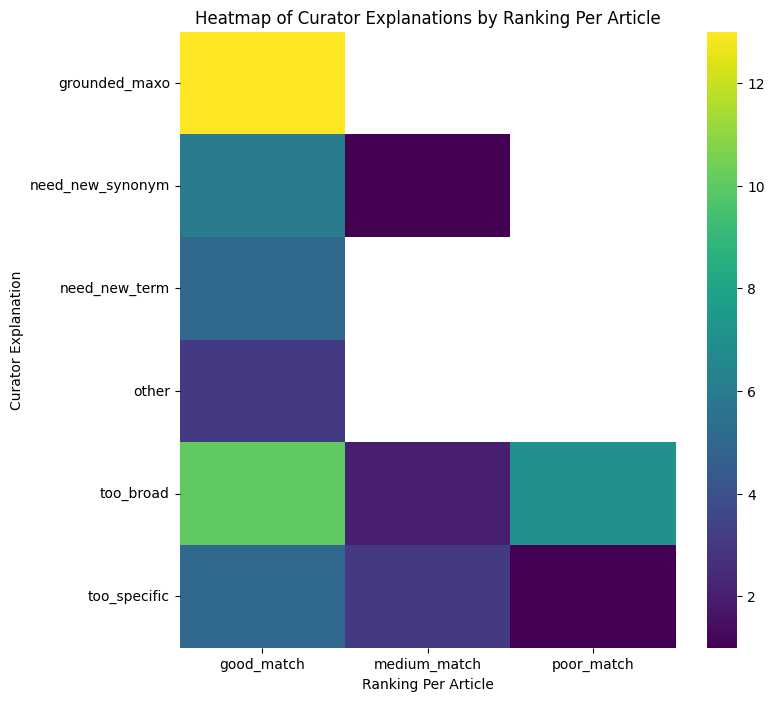

In [35]:
# Creating the DataFrame for the heatmap
df_2dhist = pd.DataFrame({
    x_label: grp['curator_explanation'].value_counts()
    for x_label, grp in automaxo_curator_feedback_df.groupby('ranking_per_citation')
})

# Plotting the heatmap
plt.subplots(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ranking Per Article')
plt.ylabel('Curator Explanation')
plt.title('Heatmap of Curator Explanations by Ranking Per Article')
plt.show()


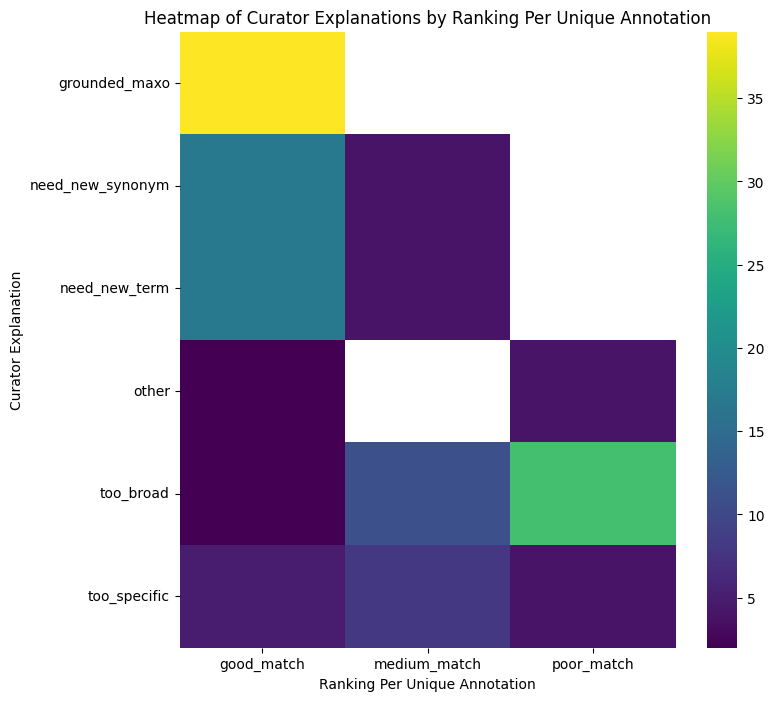

In [36]:
# Creating the DataFrame for the heatmap
df_2dhist = pd.DataFrame({
    x_label: grp['curator_explanation'].value_counts()
    for x_label, grp in automaxo_curator_feedback_df.groupby('ranking_per_cell')
})

# Plotting the heatmap
plt.subplots(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ranking Per Unique Annotation')
plt.ylabel('Curator Explanation')
plt.title('Heatmap of Curator Explanations by Ranking Per Unique Annotation')
plt.show()


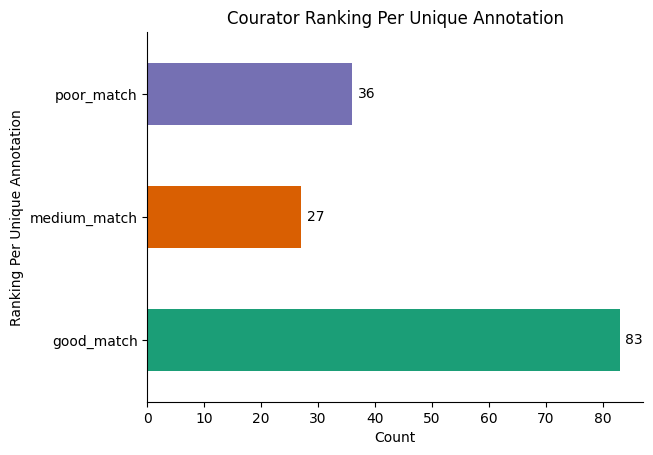

In [37]:
# Grouping and plotting
counts = automaxo_curator_feedback_df.groupby('ranking_per_cell').size()
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Adding annotations
for i, v in enumerate(counts):
    ax.text(v + 1, i, str(v), color='black', va='center')

# Customizing plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Ranking Per Unique Annotation')
plt.title('Courator Ranking Per Unique Annotation')
plt.show()

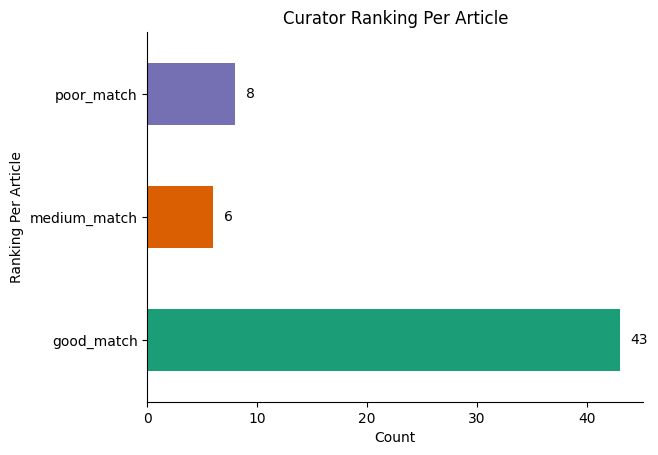

In [38]:
# Grouping and plotting
counts = automaxo_curator_feedback_df.groupby('ranking_per_citation').size()
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Adding annotations
for i, v in enumerate(counts):
    ax.text(v + 1, i, str(v), color='black', va='center')

# Customizing plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Ranking Per Article')
plt.title('Curator Ranking Per Article')
plt.show()

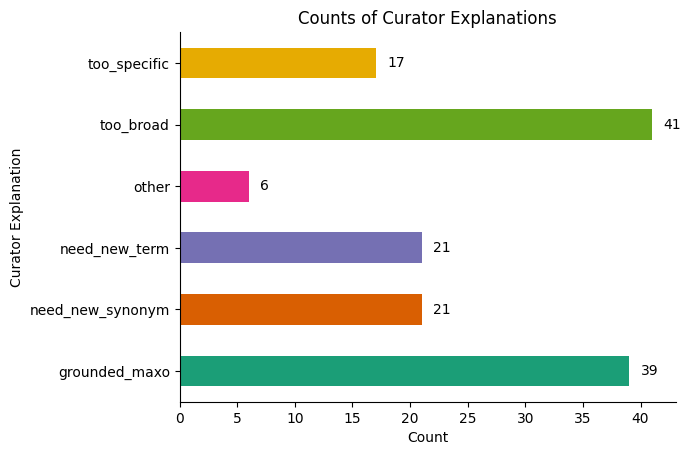

In [39]:
# Grouping and plotting
counts = automaxo_curator_feedback_df.groupby('curator_explanation').size()
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Adding annotations
for i, v in enumerate(counts):
    ax.text(v + 1, i, str(v), color='black', va='center')

# Customizing plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Curator Explanation')
plt.title('Counts of Curator Explanations')
plt.show()

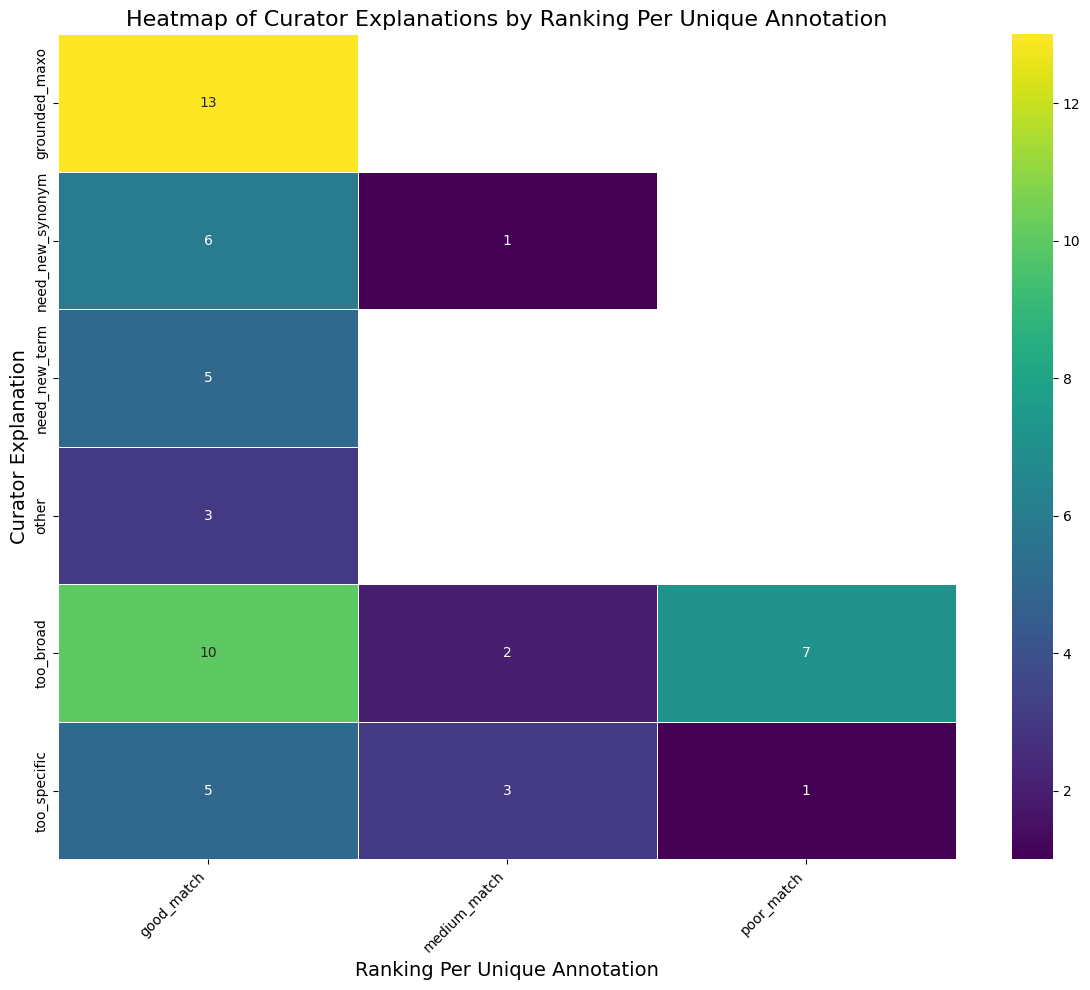

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame for the heatmap
df_2dhist = pd.DataFrame({
    x_label: grp['curator_explanation'].value_counts()
    for x_label, grp in automaxo_curator_feedback_df.groupby('ranking_per_citation')
})

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)

plt.xlabel('Ranking Per Unique Annotation', fontsize=14)
plt.ylabel('Curator Explanation', fontsize=14)
plt.title('Heatmap of Curator Explanations by Ranking Per Unique Annotation', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Use tight layout to ensure everything fits well
plt.tight_layout()
plt.show()


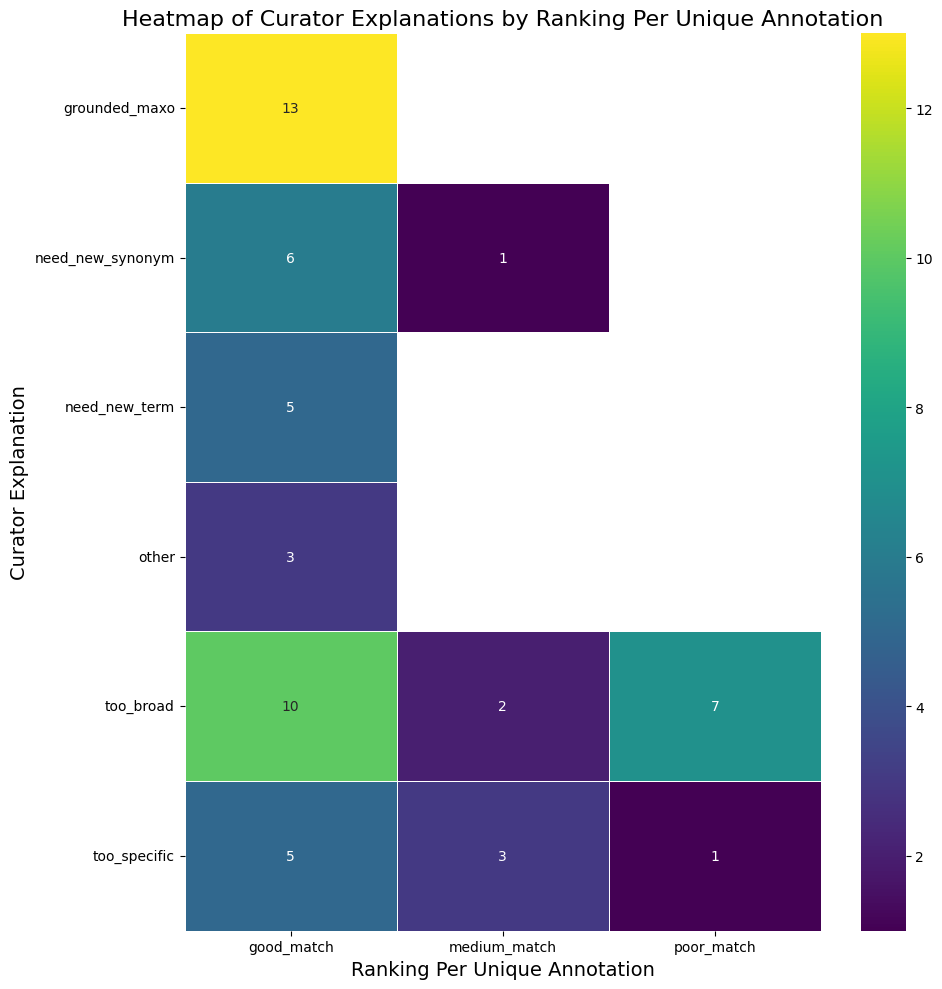

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame for the heatmap
df_2dhist = pd.DataFrame({
    x_label: grp['curator_explanation'].value_counts()
    for x_label, grp in automaxo_curator_feedback_df.groupby('ranking_per_citation')
})

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)

plt.xlabel('Ranking Per Unique Annotation', fontsize=14)
plt.ylabel('Curator Explanation', fontsize=14)
plt.title('Heatmap of Curator Explanations by Ranking Per Unique Annotation', fontsize=16)

# Set x-axis and y-axis labels to horizontal
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Use tight layout to ensure everything fits well
plt.tight_layout()
plt.show()
